# Notebook info:

* Dataset - Mnist Sign (Kaggle)
* Network - CNN
* Additional 



**links:**
https://www.kaggle.com/datamunge/sign-language-mnist/home

### Upload Data

In [0]:
import csv
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from google.colab import files

In [3]:
uploaded=files.upload()


Saving sign_mnist_test.csv to sign_mnist_test.csv
Saving sign_mnist_train.csv to sign_mnist_train (1).csv


### Load the Data

In [5]:
def get_data(filename):
    with open(filename) as training_file:
        csv_reader = csv.reader(training_file, delimiter=',')
        first_line = True
        temp_images = []
        temp_labels = []
        for row in csv_reader:
            if first_line:
                # print("Ignoring first line")
                first_line = False
            else:
                temp_labels.append(row[0])
                image_data = row[1:785]
                image_data_as_array = np.array_split(image_data, 28)
                temp_images.append(image_data_as_array)
        images = np.array(temp_images).astype('float')
        labels = np.array(temp_labels).astype('float')
    return images, labels


training_images, training_labels = get_data('sign_mnist_train (1).csv')
testing_images, testing_labels = get_data('sign_mnist_test.csv')

print(training_images.shape)
print(training_labels.shape)
print(testing_images.shape)
print(testing_labels.shape)


(27455, 28, 28)
(27455,)
(7172, 28, 28)
(7172,)


### Build and Train the model

In [7]:
training_images = np.expand_dims(training_images, axis=3)
testing_images = np.expand_dims(testing_images, axis=3)

train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

validation_datagen = ImageDataGenerator(
    rescale=1. / 255)

print(training_images.shape)
print(testing_images.shape)

(27455, 28, 28, 1)
(7172, 28, 28, 1)


In [8]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(26, activation=tf.nn.softmax)])

model.compile(optimizer = tf.train.AdamOptimizer(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit_generator(train_datagen.flow(training_images, training_labels, batch_size=32),
                              steps_per_epoch=len(training_images) / 32,
                              epochs=15,
                              validation_data=validation_datagen.flow(testing_images, testing_labels, batch_size=32),
                              validation_steps=len(testing_images) / 32)




Epoch 1/15
858/858 [==============================] - 12s 14ms/step - loss: 2.7715 - acc: 0.1594 - val_loss: 2.0884 - val_acc: 0.3302
Epoch 2/15
858/858 [==============================] - 10s 12ms/step - loss: 2.0691 - acc: 0.3412 - val_loss: 1.4737 - val_acc: 0.4937
Epoch 3/15
858/858 [==============================] - 10s 11ms/step - loss: 1.7174 - acc: 0.4479 - val_loss: 1.2360 - val_acc: 0.5860
Epoch 4/15
858/858 [==============================] - 11s 13ms/step - loss: 1.4745 - acc: 0.5260 - val_loss: 0.8639 - val_acc: 0.7135
Epoch 5/15
858/858 [==============================] - 11s 12ms/step - loss: 1.3022 - acc: 0.5735 - val_loss: 0.8062 - val_acc: 0.7369
Epoch 6/15
858/858 [==============================] - 10s 11ms/step - loss: 1.1928 - acc: 0.6102 - val_loss: 0.7103 - val_acc: 0.7586
Epoch 7/15
858/858 [==============================] - 10s 11ms/step - loss: 1.0922 - acc: 0.6403 - val_loss: 0.6043 - val_acc: 0.7920
Epoch 8/15
858/858 [==============================] - 10s 11ms

### Evaluate the model

In [9]:
model.evaluate(testing_images, testing_labels)

7172/7172 [==============================] - 0s 60us/sample - loss: 7.2788 - acc: 0.5449


[7.278828865047014, 0.54489684]

### Plot Results

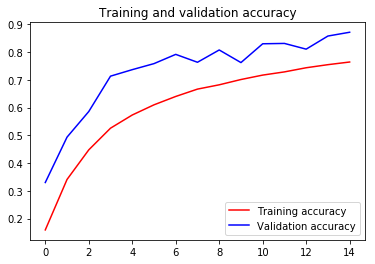

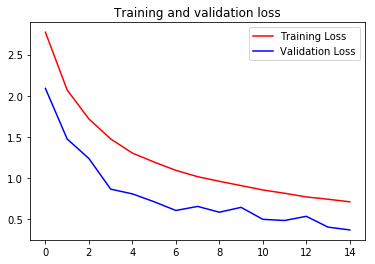

In [10]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()